# Background Project
Project kali ini menganalisis dataset tagihan kesehatan personal. Melalui analisis data ini diharapkan pengambilan keputusan berdasarkan data yang ada (data driven), sehingga keputusan yang diambil menjadi lebih tepat dan berdampak positif pada kelangsungan bisnis. Tools yang digunakan adalah bahasa pemrograman python dengan ilmu-ilmu dasar probability menggunakan library yang sesuai.

Dataset ini berisikan informasi mengenai jumlah tagihan kesehatan, usia, jenis kelamin, BMI, banyaknya tanggungan (jumlah anak), status perokok (Ya/tidak) dan wilayah tinggal. Melalui eksplorasi data yang dilakukan diharapkan bisa mendapatkan korelasi pada masing-masing variabel, membuat hipotesis dan melakukan validasi terhadap hipotesis tersebut dan berujung dengan pengambilan keputusan berdasarkan hasil validasi hipotesis.

In [59]:
# pip install scipy

     ---------------------------------------- 44.1/44.1 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [2]:
df = pd.read_csv("insurance.csv")

In [129]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [128]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
pd.set_option('display.max_rows', None)

## 1 - Analisis Descriptive Statistic

Tahap pertama dilakukan analisis descriptive statistic dari dataset untuk mendapatkan informasi dasar berupa nilai rata-rata dan sebaran data, berikut beberapa analisis descriptive statistic yang dilakukan

1. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?
2. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
3. Rata2 Tagihan overweight vs rata2 tagihan nonoverweight
4. Rata2 Tagihan laki2 perokok vs rata2 tagihan perempuan perokok
5. Rata2 Tagihan laki2 Overweight vs rata2 tagihan perempuan Overweight

In [5]:
# 1. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

var_smoker = np.var(df[df['smoker'] == 'yes']['charges'])
print(f"variansi dari tagihan kesehatan perokok: {var_smoker}")

var_nonSmoker = np.var(df[df['smoker'] == 'no']['charges'])
print(f"variansi dari tagihan kesehatan non-perokok: {var_nonSmoker}")

variansi dari tagihan kesehatan perokok: 132721153.13625307
variansi dari tagihan kesehatan non-perokok: 35891656.00316426


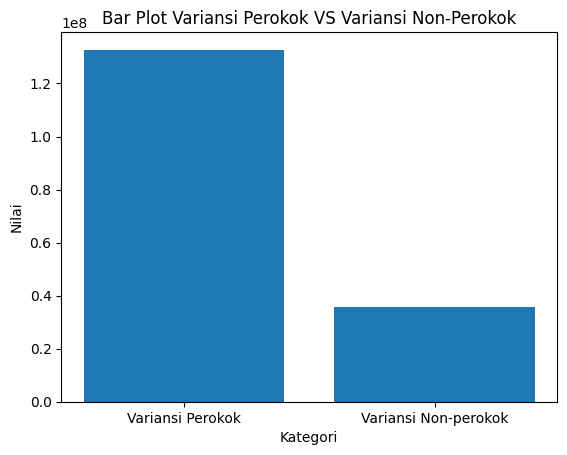

In [64]:
kategori = ['Variansi Perokok', 'Variansi Non-perokok']
values = [var_smoker, var_nonSmoker]
plt.bar(kategori,values)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Bar Plot Variansi Perokok VS Variansi Non-Perokok')
plt.show()

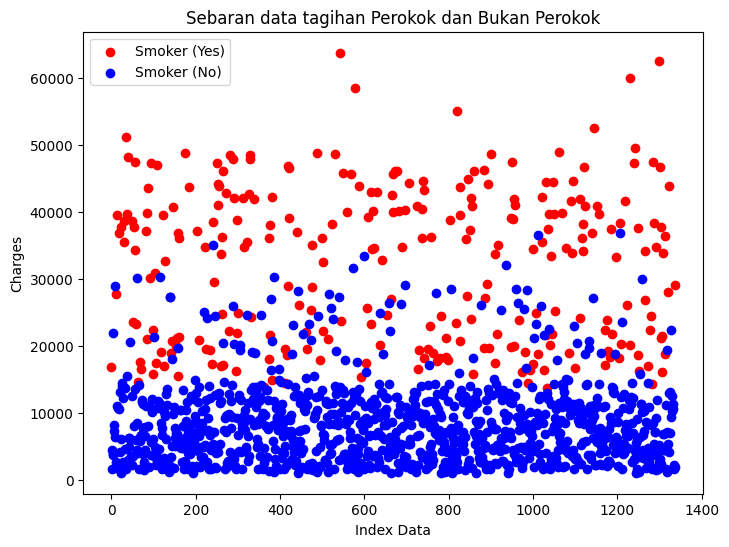

In [90]:
# Memisahkan data antara perokok dan bukan perokok
smoker_yes_charges = df[df['smoker'] == 'yes']['charges']
smoker_no_charges = df[df['smoker'] == 'no']['charges']

# Membuat Scatter Plot
plt.figure(figsize=(8, 6))

plt.scatter(smoker_yes_charges.index, smoker_yes_charges, color='red', label='Smoker (Yes)')
plt.scatter(smoker_no_charges.index, smoker_no_charges, color='blue', label='Smoker (No)')

plt.xlabel('Index Data')
plt.ylabel('Charges')
plt.title('Sebaran data tagihan Perokok dan Bukan Perokok')
plt.legend()
plt.show()

## Explanation

Berdasarkan ekplorasi data yang dilakukan diketahui tagihan perokok memiliki variansi yang lebih besar dibandingkan dengan tagihan non-perokok, artinya perokok memiliki besar tagihan kesehatan yang lebih variatif dibandingkan dengan non-perokok. Berdasarkan scatterplot bisa dilihat selain memiliki sebaran data yang lebih variatif, nilai tagihan perokok juga secara umum lebih besar dibandingkan dengan nilai tagihan non-perokok.

In [7]:
# 2. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

avg_smoker_charge = df[df['smoker'] == 'yes']['charges'].mean()
print(f"Rata2 tagihan perokok: {avg_smoker_charge}")
avg_nonsmoker_charge = df[df['smoker'] == 'no']['charges'].mean()
print(f"Rata2 tagihan non-perokok: {avg_nonsmoker_charge}")

Rata2 tagihan perokok: 32050.23183153284
Rata2 tagihan non-perokok: 8434.268297856204


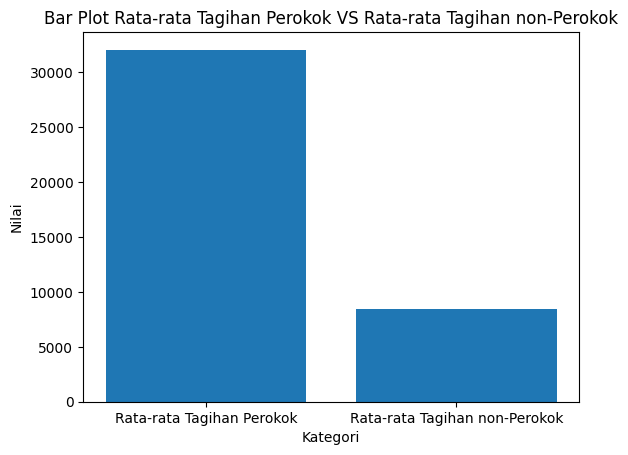

In [68]:
kategori = ['Rata-rata Tagihan Perokok', 'Rata-rata Tagihan non-Perokok']
values = [avg_smoker_charge, avg_nonsmoker_charge]
plt.bar(kategori,values)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Rata-rata Tagihan Perokok VS Rata-rata Tagihan non-Perokok')
plt.show()

## Explanation

Berdasarkan eksplorasi data, rata-rata tagihan perokok lebih besar dari rata-rata tagihan non-perokok

In [74]:
# 3. Rata2 Tagihan overweight vs rata2 tagihan nonoverweight

avg_overweight_charge = df[df['bmi'] > 25]['charges'].mean()
print(f"Rata2 Tagihan Overweight: {avg_overweight_charge}")
avg_nonoverweight_charge = df[df['bmi']<= 25]['charges'].mean()
print(f"Rata2 Tagihan Non-Overweight: {avg_nonoverweight_charge}")

Rata2 Tagihan Overweight: 13946.476035324473
Rata2 Tagihan Non-Overweight: 10284.290025182185


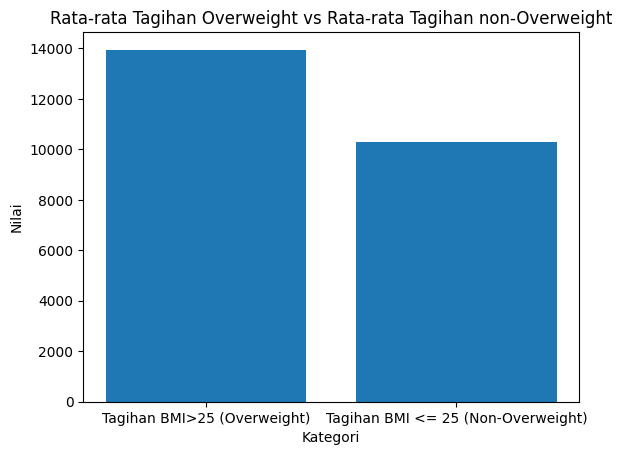

In [75]:
kategori = ['Tagihan BMI>25 (Overweight)', 'Tagihan BMI <= 25 (Non-Overweight)']
values = [avg_overweight_charge, avg_nonoverweight_charge]
plt.bar(kategori,values)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Rata-rata Tagihan Overweight vs Rata-rata Tagihan non-Overweight')
plt.show()

In [76]:
# 4. Rata2 Tagihan laki2 perokok vs rata2 tagihan perempuan perokok

avg_male_smoker_charge = df[(df['sex']=='male') & (df['smoker']=='yes')]['charges'].mean()
print(f"Rata2 Tagihan Perokok (laki-laki): {avg_male_smoker_charge}")
avg_female_smoker_charge = df[(df['sex']=='female') & (df['smoker']=='yes')]['charges'].mean()
print(f"Rata2 Tagihan Perokok (perempuan): {avg_female_smoker_charge}")

Rata2 Tagihan Perokok (laki-laki): 33042.00597528303
Rata2 Tagihan Perokok (perempuan): 30678.996276260867


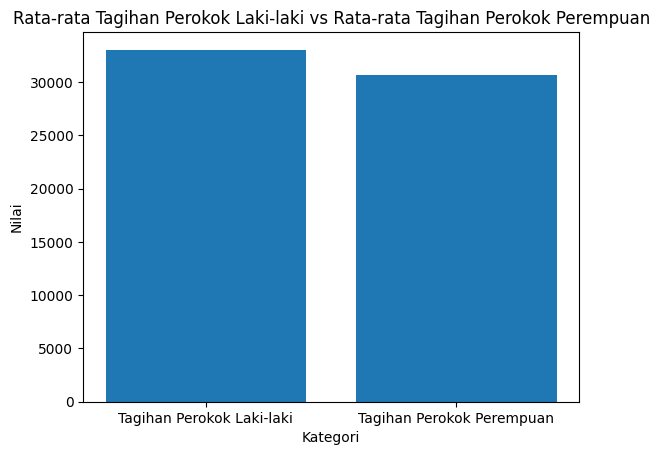

In [78]:
kategori = ['Tagihan Perokok Laki-laki', 'Tagihan Perokok Perempuan']
values = [avg_male_smoker_charge, avg_female_smoker_charge]
plt.bar(kategori,values)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Rata-rata Tagihan Perokok Laki-laki vs Rata-rata Tagihan Perokok Perempuan')
plt.show()

In [94]:
# 5. Rata2 Tagihan laki2 Overweight vs rata2 tagihan perempuan Overweight

avg_male_overweight_charge = df[(df['sex']=='male') & (df['bmi']>25)]['charges'].mean()
print(f"Rata2 Tagihan laki2 Overweight: {avg_male_overweight_charge}")
avg_female_overweight_charge = df[(df['sex']=='female') & (df['bmi']>25)]['charges'].mean()
print(f"Rata2 Tagihan perempuan Overweight: {avg_female_overweight_charge}")

Rata2 Tagihan laki2 Overweight: 14864.507100464287
Rata2 Tagihan perempuan Overweight: 12978.307680374764


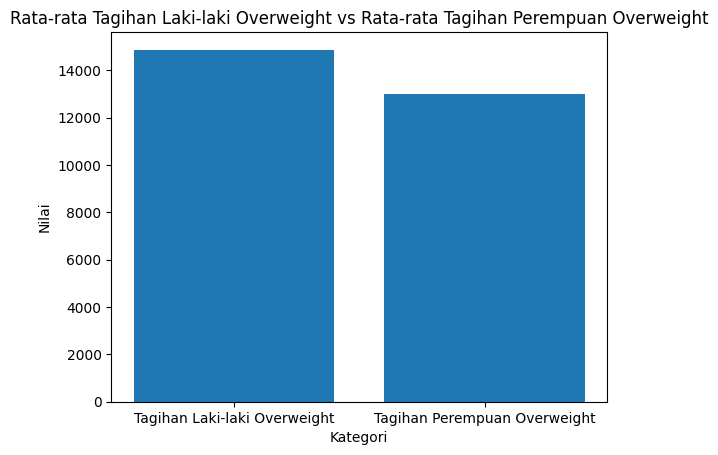

In [80]:
kategori = ['Tagihan Laki-laki Overweight', 'Tagihan Perempuan Overweight']
values = [avg_male_overweight_charge, avg_female_overweight_charge]
plt.bar(kategori,values)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Rata-rata Tagihan Laki-laki Overweight vs Rata-rata Tagihan Perempuan Overweight')
plt.show()

## Explanation

Berdasarkan ekplorasi data yang dilakukan diketahui tagihan perokok memiliki variansi yang lebih besar dibandingkan dengan tagihan non-perokok, artinya perokok memiliki besar tagihan kesehatan yang lebih variatif dibandingkan dengan non-perokok. Berdasarkan scatterplot bisa dilihat selain memiliki sebaran data yang lebih variatif, nilai tagihan perokok juga secara umum lebih besar dibandingkan dengan nilai tagihan non-perokok.
Berdasarkan eksplorasi data, rata-rata tagihan perokok lebih besar dari rata-rata tagihan non-perokok
Rata-rata tagihan kesehatan orang yang overweight (BMI > 25) lebih besar dari orang non-overweight
Rata-rata tagihan perokok laki-laki lebih besar dari tagihan perokok Perempuan
Rata-rata tagihan laki-laki overweight lebih besar dari tagihan Perempuan overweight


## 2 - Analisis Variabel Diskrit

Tahapan kedua adalah analisis variabel diskrit, variabel diskrit merupakan variabel data tunggal atau bersifat diskrit (tidak kontinu/ tidak dalam range)

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

In [11]:
# 1. Gender mana yang memiliki tagihan paling tinggi?
df.loc[df['charges'] == max_charge]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [12]:
# 2. Distribusi peluang tagihan di tiap-tiap region

charge_distribution_byregion = df.groupby('region')['charges'].describe()
charge_distribution_byregion

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


In [20]:
# 3. Mana yang lebih tinggi proporsi perokok atau non perokok?
smoker_proportion = df['smoker'].value_counts()
smoker_proportion

smoker
no     1064
yes     274
Name: count, dtype: int64

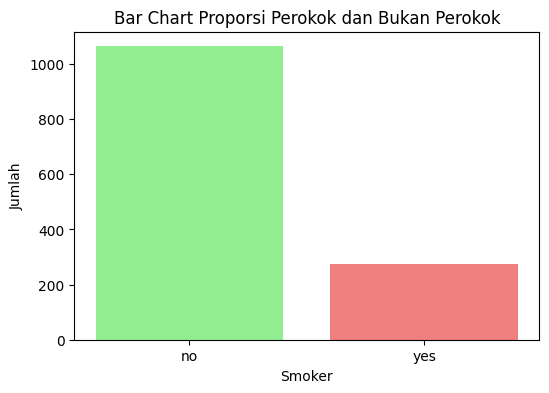

In [81]:
# Membuat Bar Chart
plt.figure(figsize=(6, 4))

# Menentukan warna bar untuk setiap kategori
colors = ['lightgreen', 'lightcoral']

plt.bar(smoker_proportion.index, smoker_proportion, color=colors)
plt.xlabel('Smoker')
plt.ylabel('Jumlah')
plt.title('Bar Chart Proporsi Perokok dan Bukan Perokok')
plt.show()

In [19]:
# 4. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
female_smoker = len(df[(df['smoker'] == 'yes') & (df['sex'] == 'female')])
smoker = (df['smoker'] == 'yes').sum()
probaility_female_smoker = female_smoker / smoker
probaility_female_smoker

0.4197080291970803

In [21]:
# 5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
male_smoker = len(df[(df['smoker'] == 'yes') & (df['sex'] == 'male')])
probaility_male_smoker = male_smoker / smoker
probaility_male_smoker

0.5802919708029197

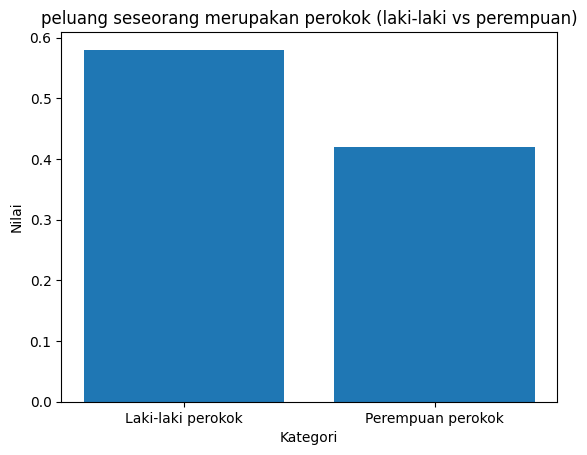

In [84]:
kategori = ['Laki-laki perokok', 'Perempuan perokok']
values = [probaility_male_smoker, probaility_female_smoker]
plt.bar(kategori,values)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('peluang seseorang merupakan perokok (laki-laki vs perempuan)')
plt.show()

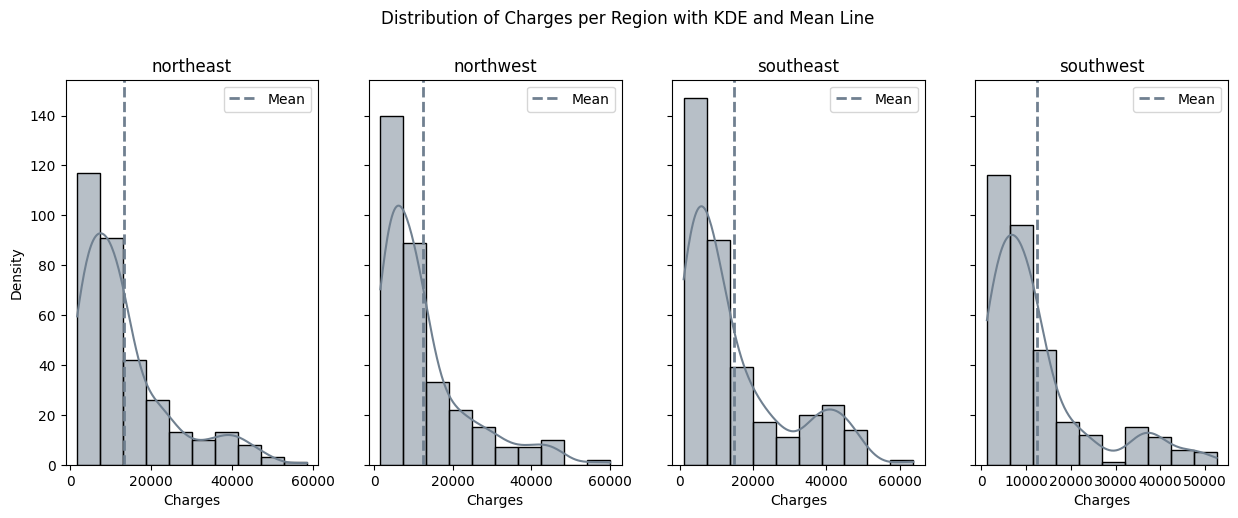

In [6]:
# Create subplots for each region
fig, axs = plt.subplots(1, len(df['region'].unique()), figsize=(15, 5), sharey=True)

# Iterate through each region and create histogram with KDE
for i, (region, data_region) in enumerate(df.groupby('region')['charges']):
    # Create histogram using Seaborn with different color for bins
    sns.histplot(data_region, bins=10, kde=True, ax=axs[i], color='slategrey', edgecolor='black')
    
    # Add the average line based on the mean value with a red color
    mu = data_region.mean()
    axs[i].axvline(mu, color='slategrey', linestyle='dashed', linewidth=2, label='Mean')  
    
    
    # Add title, labels, and legend
    axs[i].set_title(region)
    axs[i].set_xlabel('Charges')
    axs[i].set_ylabel('Density')
    axs[i].legend()

# Add the overall title
fig.suptitle('Distribution of Charges per Region with KDE and Mean Line', y=1.02)

# Show the subplots
plt.show()

In [267]:
# 6. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?
# Skewness > 0 (Positif): Distribusi condong ke kanan.

# Ekor distribusi lebih panjang di sebelah kanan.
# Nilai-nilai tinggi (outlier) lebih tersebar.

## 3 - Analisis Variabel Kontinu

1. Mana yang lebih mungkin terjadi

a. Seseorang dengan BMI diatas 25 diketahui memiliki tagihan kesehatan diatas 16.7k,
                atau
                
b. Seseorang dengan BMI dibawah 25 diketahui memiliki tagihan kesehatan diatas 16.7k


2. Mana yang lebih mungkin terjadi

a. Seseorang perokok diketahui memiliki BMI diatas 25 dan tagihan Kesehatan diatas 16.7k, 
                atau
                
b. Seseorang non perokok diketahui BMI diatas 25 dan tagihan Kesehatan diatas 16.7k

In [22]:
'''
1. Mana yang lebih mungkin terjadi
a. Seseorang dengan BMI diatas 25 diketahui memiliki tagihan kesehatan diatas 16.7k,
                                     atau
b. Seseorang dengan BMI dibawah 25 diketahui memiliki tagihan kesehatan diatas 16.7k
'''


'\n1. Mana yang lebih mungkin terjadi\n\na. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,\natau\n\nb. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas\n16.7k\n'

In [92]:
# Menetapkan batas tagihan kesehatan
threshold_charges = 16700

# 1. Analisis untuk pertanyaan pertama
# a. Seseorang dengan BMI diatas 25 diketahui memiliki tagihan kesehatan diatas 16.7k
condition_a = (df['bmi']>25) & (df['charges'] > threshold_charges)

# b. Seseorang dengan BMI dibawah 25 diketahui memiliki tagihan kesehatan diatas 16.7k
condition_b = (df['bmi']<25) & (df['charges'] > threshold_charges)

# Menghitung proporsi menggunakan SciPy
prop_a = np.sum(condition_a) / (df['charges'] > threshold_charges).sum()
prop_b = np.sum(condition_b) / (df['charges'] > threshold_charges).sum()

print(f'Seseorang dengan BMI diatas 25 diketahui memiliki tagihan kesehatan diatas 16.7k: {prop_a:.2%}')
print(f'Seseorang dengan BMI dibawah 25 diketahui memiliki tagihan kesehatan diatas 16.7k: {prop_b:.2%}')

Seseorang dengan BMI diatas 25 diketahui memiliki tagihan kesehatan diatas 16.7k: 84.73%
Seseorang dengan BMI dibawah 25 diketahui memiliki tagihan kesehatan diatas 16.7k: 15.27%


In [ ]:
'''
2. Mana yang lebih mungkin terjadi

a. Seseorang perokok diketahui memiliki BMI diatas 25 dan tagihan Kesehatan diatas 16.7k, 
                atau
                
b. Seseorang non perokok diketahui BMI diatas 25 dan tagihan Kesehatan diatas 16.7k
'''

In [93]:
# Menetapkan batas tagihan kesehatan
threshold_charges = 16700

# 2. Analisis untuk pertanyaan kedua
# a. Seseorang perokok diketahui memiliki BMI diatas 25 dan tagihan Kesehatan diatas 16.7k
condition_a = (df['bmi']>25) & (df['charges'] > threshold_charges) & (df['smoker']=='yes')

# b. Seseorang non perokok diketahui BMI diatas 25 dan tagihan Kesehatan diatas 16.7k
condition_b = (df['bmi']>25) & (df['charges'] > threshold_charges) & (df['smoker']=='no')

# Menghitung proporsi menggunakan SciPy
prop_a = np.sum(condition_a) / ((df['bmi']>25) & (df['charges'] > threshold_charges)).sum()
prop_b = np.sum(condition_b) / ((df['bmi']>25) & (df['charges'] > threshold_charges)).sum()

print(f'Proporsi Seseorang perokok diketahui memiliki BMI diatas 25 dan tagihan Kesehatan diatas 16.7k: {prop_a:.2%}')
print(f'Proporsi Seseorang non perokok diketahui BMI diatas 25 dan tagihan Kesehatan diatas 16.7k: {prop_b:.2%}')

Proporsi Seseorang perokok diketahui memiliki BMI diatas 25 dan tagihan Kesehatan diatas 16.7k: 75.97%
Proporsi Seseorang non perokok diketahui BMI diatas 25 dan tagihan Kesehatan diatas 16.7k: 24.03%


## 4 - Analisis Korelasi Variabel
Analisis untuk melihat keterhubungan antar variabel yang ada pada dataset

In [26]:
corr_int_value = df[['age', 'bmi', 'children', 'charges']].corr()
corr_int_value

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [28]:
df['sex_cat'] = df['sex'].map({"female":0, "male":1})
df['smoker_cat'] = df['smoker'].map({"no":0, "yes":1})
corr_all_value = df[['age', 'bmi', 'children', 'charges','sex_cat','smoker_cat']].corr()
corr_all_value

,age,bmi,children,charges,sex_cat,smoker_cat
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
sex_cat,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
smoker_cat,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


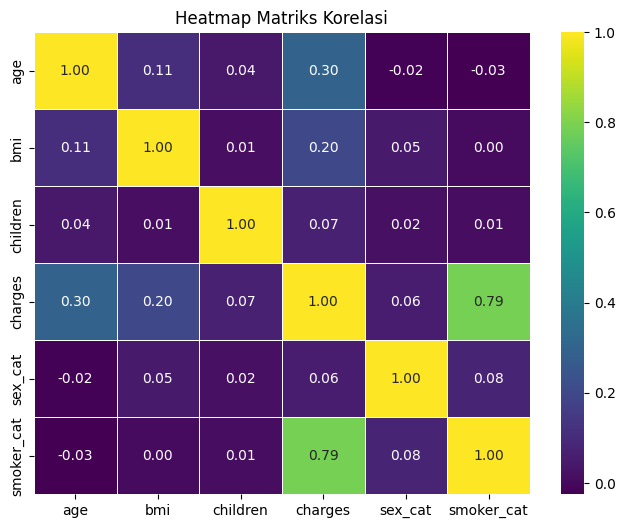

In [86]:
# Membuat Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_all_value, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi')
plt.show()


In [29]:
# Alternate Code
# df[['age', 'bmi', 'children', 'charges','sex_cat','smoker_cat']].corr(method='spearman')

## 5 - Pengujian Hipotesis
Tahapan selanjutnya adalah validasi hipotesis, H0 diambil dari analisis deskriptive statistic, mengasumsikan hasil analisis deskriptive adalah sesuatu yang benar (not guilty)

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
3. Tagihan kesehatan laki-laki perokok lebih besar dari tagihan kesehatan perempuan perokok
4. Tagihan kesehatan laki-laki overweight lebih besar dari tagihan kesehatan perempuan overweight

In [34]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

smoker_charge = df[df['smoker'] == 'yes']['charges']
nonsmoker_charge = df[df['smoker'] == 'no'][ 'charges']

h0 = Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

h1 = Tagihan kesehatan perokok kurang dari tagihan kesehatan non perokok

In [46]:
print(f"Varians smoker charge: {np.var(smoker_charge)}")
print(f"Varians non-smoker charge: {np.var(nonsmoker_charge)}")

Varians smoker charge: 132721153.13625307
Varians non-smoker charge: 35891656.00316426


In [37]:
# Lakukan statistik uji T dan hitung p_value
test_stats, p_value = ttest_ind(a=smoker_charge, b=nonsmoker_charge, equal_var=False, alternative='less')
print(f"Hasil Uji T: {test_stats}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Hasil Uji T: 32.751887766341824
P-value: 1.0
Gagal tolak H0


In [42]:
crit_test = t.ppf(alpha, len(smoker_charge)-1)
print(test_stats)
if test_stats < crit_test:
    print("Tolak H0")
else:
    print("Gagal tolak H0")

32.751887766341824
Gagal tolak H0


In [47]:
# 2 Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
overweight_charge = df[df['bmi'] > 25]['charges']
nonoverweight_charge = df[df['bmi'] < 25]['charges']

h0 = Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

h1 = Tagihan kesehatan dengan BMI diatas 25 lebih rendah daripada tagihan kesehatan dengan BMI dibawah 25

In [49]:
print(f"Varians overweight charge: {np.var(overweight_charge)}")
print(f"Varians non-overweight charge: {np.var(nonoverweight_charge)}")

Varians overweight charge: 164579189.52132663
Varians non-overweight charge: 56326859.63068616


In [50]:
# Lakukan statistik uji T dan hitung p_value
test_stats, p_value = ttest_ind(a=overweight_charge, b=nonoverweight_charge, equal_var=False, alternative='less')
print(f"Hasil Uji T: {test_stats}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Hasil Uji T: 5.929878344096734
P-value: 0.9999999974595514
Gagal tolak H0


In [51]:
crit_test = t.ppf(alpha, len(smoker_charge)-1)
print(test_stats)
if test_stats < crit_test:
    print("Tolak H0")
else:
    print("Gagal tolak H0")

5.929878344096734
Gagal tolak H0


In [52]:
# 3. Tagihan kesehatan laki-laki perokok lebih besar dari tagihan kesehatan perempuan perokok
male_smoker_charge= df[(df['sex']=='male') & (df['smoker']=='yes')]['charges']
female_smoker_charge = df[(df['sex']=='female') & (df['smoker']=='yes')]['charges']

In [53]:
print(f"Varians male smoker charge: {np.var(male_smoker_charge)}")
print(f"Varians female smoker charge: {np.var(female_smoker_charge)}")

Varians male smoker charge: 124710527.30114163
Varians female smoker charge: 140556471.15674245


h0 = Tagihan kesehatan laki-laki perokok lebih besar dari tagihan kesehatan perempuan perokok

h1 = Tagihan kesehatan laki-laki perokok lebih kecil dari tagihan kesehatan perempuan perokok

In [54]:
# Lakukan statistik uji T dan hitung p_value
test_stats, p_value = ttest_ind(a=male_smoker_charge, b=female_smoker_charge, equal_var=False, alternative='less')
print(f"Hasil Uji T: {test_stats}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Hasil Uji T: 1.661679089734955
P-value: 0.9510495048344156
Gagal tolak H0


In [55]:
crit_test = t.ppf(alpha, len(smoker_charge)-1)
print(test_stats)
if test_stats < crit_test:
    print("Tolak H0")
else:
    print("Gagal tolak H0")

1.661679089734955
Gagal tolak H0


In [58]:
# 4. Tagihan kesehatan laki-laki overweight lebih besar dari tagihan kesehatan perempuan overweight
male_overweight_charge= df[(df['sex']=='male') & (df['bmi']>25)]['charges']
female_overweight_charge = df[(df['sex']=='female') & (df['bmi']>25)]['charges']

In [59]:
print(f"Varians male overweight charge: {np.var(male_overweight_charge)}")
print(f"Varians female overweight charge: {np.var(female_overweight_charge)}")

Varians male overweight charge: 186242648.67635614
Varians female overweight charge: 139906445.0054633


h0 = Tagihan kesehatan laki-laki overweight lebih besar dari tagihan kesehatan perempuan overweight

h1 = Tagihan kesehatan laki-laki overweight lebih kecil dari tagihan kesehatan perempuan overweight

In [60]:
# Lakukan statistik uji T dan hitung p_value
test_stats, p_value = ttest_ind(a=male_overweight_charge, b=female_overweight_charge, equal_var=False, alternative='less')
print(f"Hasil Uji T: {test_stats}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Tolak H0")
else:
    print("Gagal Tolak H0")

Hasil Uji T: 2.4408860968346717
P-value: 0.9925944898148965
Gagal Tolak H0


In [61]:
crit_test = t.ppf(alpha, len(smoker_charge)-1)
print(test_stats)
if test_stats < crit_test:
    print("Tolak H0")
else:
    print("Gagal tolak H0")

2.4408860968346717
Gagal tolak H0
